# Simulated data performance
> coPTR vs aPTR on simulated dataset

In [1]:
import sys
sys.path.append('/home/phil/aptr')
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# First things first
Are there even any overlaps?

## Loading and preprocessing data

In [7]:
true_ptrs = pd.read_table(
    "/home/phil/aptr/experiments/simulated_complete/1e5/ptrs.tsv",
    dtype={0: str}
)
true_ptrs = true_ptrs.set_index("genome")
true_ptrs


,0,1,2,3,4,5,6,7,8,9
genome,,,,,,,,,,
1076934.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.822451
111781.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.61444,NaN
1123519.7,NaN,1.090712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1129794.4,NaN,NaN,NaN,1.093738,NaN,NaN,NaN,NaN,NaN,NaN
1150621.9,NaN,1.693040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
862971.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.593803
880070.3,NaN,NaN,NaN,NaN,NaN,NaN,1.869938,NaN,NaN,NaN
904294.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.56358,NaN


In [11]:
# aptr_path = '../experiments/synthetic/aptr_out_100_nofilter/inferred_ptrs.tsv'
aptr_path = '../../experiments/simulated_complete/1e5/aptr_out_with_bias/inferred_ptrs.tsv'
aptr_ptrs = pd.read_csv(aptr_path, sep='\t', dtype={0: str})
aptr_ptrs = aptr_ptrs.set_index('Unnamed: 0')
aptr_ptrs.columns = true_ptrs.columns
aptr_ptrs

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,,,,,,,,,,
1076934.5,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.0
313595.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000112,NaN,NaN
467705.9,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1392487.3,NaN,NaN,1.003236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1150621.9,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
743721.3,NaN,NaN,NaN,NaN,1.000519,NaN,NaN,NaN,NaN,NaN
387092.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000790,NaN
84588.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.093267,NaN,NaN


## Checking agreement

In [15]:
good_aptr = ~np.isnan(aptr_ptrs)
good_true = ~np.isnan(true_ptrs)
good_both = good_aptr & good_true

# How many genomes have both good PTRs?
good_both.sum().sum()

64

In [21]:
true_ptrs.reindex(aptr_ptrs.index)[good_both]\
    .dropna(how='all', axis=0).dropna(how='all', axis=1)

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,,,,,,,,,,
1076934.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.822451
313595.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.499088,NaN,NaN
467705.9,NaN,NaN,NaN,NaN,NaN,1.980718,NaN,NaN,NaN,NaN
1392487.3,NaN,NaN,1.308985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1150621.9,NaN,1.693040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499177.3,NaN,NaN,NaN,NaN,1.898042,NaN,1.064767,NaN,NaN,NaN
1347342.6,NaN,NaN,NaN,NaN,1.457863,NaN,NaN,NaN,NaN,NaN
1499687.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.418675,NaN,NaN
452652.3,NaN,1.738240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
aptr_ptrs[good_both].dropna(how='all', axis=0).dropna(how='all', axis=1)

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,,,,,,,,,,
1076934.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
313595.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000112,NaN,NaN
467705.9,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
1392487.3,NaN,NaN,1.003236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1150621.9,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499177.3,NaN,NaN,NaN,NaN,2.000000,NaN,1.245504,NaN,NaN,NaN
1347342.6,NaN,NaN,NaN,NaN,1.254444,NaN,NaN,NaN,NaN,NaN
1499687.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
452652.3,NaN,1.257975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'With amplicon bias modeled')

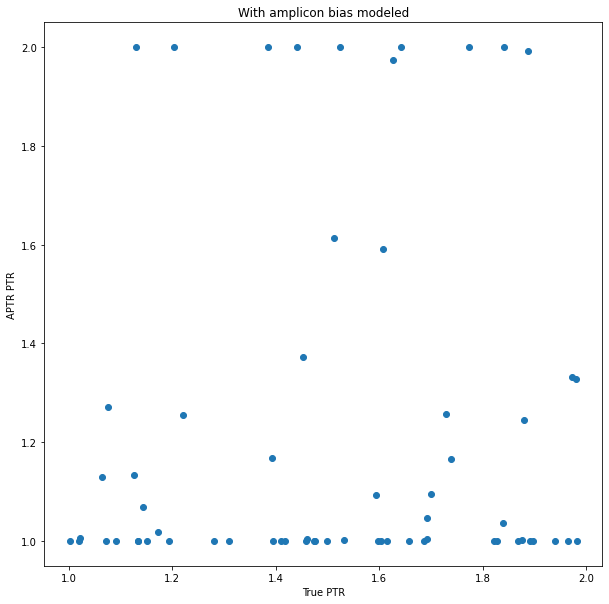

In [42]:
tp = true_ptrs[good_both].values.flatten()
ap = aptr_ptrs[good_both].values.flatten()
tp = tp[~np.isnan(tp)]
ap = ap[~np.isnan(ap)]

fig = plt.figure(figsize=(10, 10))
plt.scatter(tp, ap)
plt.xlabel("True PTR")
plt.ylabel("APTR PTR")
plt.title("With amplicon bias modeled")


In [48]:
# What if we simulated directly?

from src.simulation_new import simulate_samples
from src.torch_solver import TorchSolver
from src.database import RnaDB

rnadb = RnaDB(
    path_to_dnaA="/home/phil/aptr/data/allDnaA.tsv",
    path_to_16s="/home/phil/aptr/data/allSSU.tsv",
)

def test_with_simulation(genome, log_ptr, db=rnadb):
    sample = simulate_samples(genome=genome, log_ptr=log_ptr, db=rnadb)
    solver = TorchSolver(
        genomes=db.generate_genome_objects([genome])[0], coverages=sample
    )
    a, b, l = solver.train(verbose=False, epochs=2)
    return a, b, l, solver

for genome in rnadb.complete_genomes[:10]:
    print(genome)
    a, b, l, solver = test_with_simulation(genome, 0.0)
    print(a, b, solver.h)
    print()

0.9992494370778083 sequences remain after trimming
0.6346009507130348 sequences remain after filtering
398579.7


TypeError: simulate_samples() got an unexpected keyword argument 'genome'

In [ ]:
abundances = np.random.randn(5, 10)
abundances = np.exp(abundances) # lognormal distribution

logptrs = np.random.rand(5, 10)



In [46]:
# What are the correlations?

from scipy.stats import pearsonr

print(pearsonr(tp, ap))
print(pearsonr(tp2, ap2))

(0.07917056524860044, 0.5340347743136827)
(-0.09601508525911476, 0.45041230656930686)


In [13]:
n_reads = pd.read_csv("../experiments/synthetic/aptr_out_99_nofilter/n_reads_used.tsv", sep='\t', dtype={0: str})
n_reads = n_reads.set_index('Unnamed: 0')
n_reads.columns = [sample_dict[x] for x in n_reads.columns]
n_reads[good_both].dropna(how='all', axis=0).dropna(how='all', axis=1)

,MIX1,MIX2,MIX3,IL10-C,IL10-HF,CDIFFA,CDIFFB,DON1A,DON1B,MIX9A,DON2A,DON2B,DON2C,DON3A,DON3B
Unnamed: 0,,,,,,,,,,,,,,,
390333.7,2396.939717,2753.976774,948.449815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435590.9,564.899272,621.934347,297.873517,NaN,17.63945,NaN,NaN,8.023749,6.278242,423.089833,11.523102,6.174554,23.013836,7.428055,8.461485
367928.6,NaN,NaN,NaN,NaN,NaN,1869.851074,1325.234417,NaN,NaN,NaN,NaN,NaN,NaN,612.439734,711.881229
557436.4,NaN,NaN,NaN,17.471119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28116.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.678694,240.038212,NaN,1535.502698,809.380611,3034.549741,1110.170312,1300.507036


Text(0.5, 1.0, 'Error in PTR vs. number of reads used')

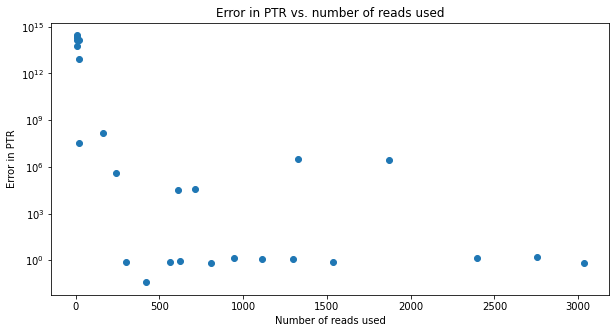

In [14]:
errs = aptr_ptrs[good_both] - coptr_ptrs[good_both]
cols = set(coptr_ptrs.columns) & set(aptr_ptrs.columns)
errs = errs[cols]

fig = plt.figure(figsize=(10, 5))
plt.scatter(
    n_reads[good_both].reindex(errs.index)[cols].values.flatten(),
    np.abs(errs).values.flatten()
)
plt.yscale("log")
# plt.ylim(np.abs(errs).values.min(), 1e17)
plt.xlabel("Number of reads used")
plt.ylabel("Error in PTR")
plt.title("Error in PTR vs. number of reads used")

# Manual exploration

Computing PTRs by hand for specific promising clades. Here we notice that the
genome `435590.9` (Bacteroides vulgatus) has promising amounts of coverage:

In [15]:
# Load intermediate database to ensure MD5s match OTU table

import pickle

db = pickle.load(open("../experiments/synthetic/aptr_out_100/db.pkl", "rb"))
db.db

,genome,n_contigs,contig,feature,16s_position,oor_position,size,16s_sequence,md5
60,575540.3,2,NC_014962,fig|575540.3.rna.55,5377423,202,5529304,tgccagcagccgcggtaagacgaaccgtgcaaacgttattcggaat...,d56813f94d066da79326147843d54c1f
61,575540.3,2,NC_014962,fig|575540.3.rna.46,4713338,202,5529304,tgccagcagccgcggtaagacgaaccgtgcaaacgttattcggaat...,d56813f94d066da79326147843d54c1f
62,575540.3,2,NC_014962,fig|575540.3.rna.38,4041636,202,5529304,tgccagcagccgcggtaagacgaaccgtgcaaacgttattcggaat...,e997d7a3c0c347d96d50214d6ed2f787
95,546269.5,1,CP002390,fig|546269.5.rna.10,719673,88,1931012,tgccagcagccgcggtaatacgtagggggcaagcgttatccggaat...,4ebce09c21f3d04f64f0e5eb1b8a4847
96,546269.5,1,CP002390,fig|546269.5.rna.33,764888,88,1931012,tgccagcagccgcggtaatacgtagggggcaagcgttatccggaat...,4ebce09c21f3d04f64f0e5eb1b8a4847
...,...,...,...,...,...,...,...,...,...
7926,471881.3,11,NZ_GG661996,fig|471881.3.rna.29,198505,124357,3749229,tgccagcagccgcggtaatacggagggtgcaagcgttaatcggaat...,cb3a2710c3e4da0ab88cde482a04435a
7957,644284.3,1,NC_014218,fig|644284.3.rna.48,1610087,77,1986154,tgccagcagccgcggtaatacgtagggcgcgagcgttgtccggaat...,1ad5fe0a24204313cd97864252f30d90
7958,644284.3,1,NC_014218,fig|644284.3.rna.11,493763,77,1986154,tgccagcagccgcggtaatacgtagggcgcgagcgttgtccggaat...,908d6a7f038e6fdffa6b3845547f0c5a
7959,644284.3,1,NC_014218,fig|644284.3.rna.35,1073265,77,1986154,tgccagcagccgcggtaatacgtagggcgcgagcgttgtccggaat...,908d6a7f038e6fdffa6b3845547f0c5a


In [16]:
# Add genome IDs to OTU table

otu_table = pd.read_csv("../experiments/synthetic/aptr_out_100/otu_table.tsv", sep='\t', dtype={0: str})
otu_table = otu_table.set_index('#OTU ID')
otu_table.columns = [sample_dict[x] for x in otu_table.columns]
otu_table["genomes"] = [db.find_genomes_by_md5([x]) for x in otu_table.index]
otu_table = otu_table[["genomes", *otu_table.columns[:-1]]]
otu_table = otu_table.sort_values(by="genomes", ascending=False)
otu_table

,genomes,MIX1,MIX2,MIX3,CD4Bx,CD4TisA,CD11Bx,CD11TisA,CD4TisB,CD11TisB,...,MIX7B,MIX8A,MIX8B,MIX9A,DON2A,DON2B,DON2C,DON3A,DON3B,DON3C
#OTU ID,,,,,,,,,,,,,,,,,,,,,
9dd1c3b75daf034bc431cb886600a4f6,[762550.4],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4cc7fa868f6553cd7b0ff99a67f87641,[714313.3],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3cd7622d7072c198b7d19c6996254301,[701521.8],0,0,0,0,0,0,0,0,0,...,5,0,3,2,0,0,0,0,0,0
1b58e2aa85779bd1db01cd0fed155601,[701521.8],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80f8b4dba9e498d49c3254cd20ebe0f0,[66692.6],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4d891631a5931de4c4de1ac7fa0cfdf0,[640131.3],0,0,0,0,0,0,0,0,0,...,13,14,19,10,0,0,0,0,0,0
fefd61bb00126e4bf352ad4b319a3902,[637910.3],0,0,0,0,0,0,0,0,0,...,1188,3089,2222,2045,0,0,0,0,0,0
27b337b1f5c98c155a3a62984aca8a3f,[637910.3],0,0,0,0,0,0,15,0,39,...,8837,22952,15702,14429,0,0,0,0,0,0
8c3a8045575161030c76b6c5e8b1e5a3,"[592022.4, 1348623.7, 545693.3]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


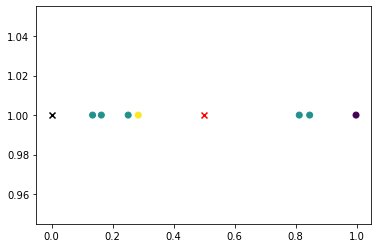

In [30]:
# Plot the sequences and locations for genome 435590.9:

obj, md5s, gen2seq = db.generate_genome_objects("435590.9")

# 16S positions marked with a dot, colored by MD5
plt.scatter(
    x=obj[0]['pos'].flatten(), 
    y=np.ones(len(obj[0]['pos'])),
    c=obj[0]['seqs']
)

# OOR marked with an X
plt.scatter(
    x=db["435590.9"]['oor_position'].iloc[0] / db["435590.9"]['size'].iloc[0],
    y=1,
    marker='x',
    c='black'
)

# Trough marked with an X
plt.scatter(
    x=(db["435590.9"]['oor_position'].iloc[0] + 
    (db["435590.9"]['size'].iloc[0] / 2)) / db["435590.9"]['size'].iloc[0],
    y=1,
    marker='x',
    c='red'
)

# 8417c6a78dc4334150c2f4df256820ee (yellow) is near OOR
# c89d1de8519a383c4ded7c4c4d749b5a (purple) is near trough

In [21]:
# Since the yellow sequence (8417...) 

otus_reduced / otus_reduced.loc["c89d1de8519a383c4ded7c4c4d749b5a"] 
# This is a problem... we should not see 8417... lower than 1

,MIX1,MIX2,MIX3,CD4Bx,MIX7A,MIX7B,MIX8A,MIX8B,MIX9A
#OTU ID,,,,,,,,,
c89d1de8519a383c4ded7c4c4d749b5a,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000,1.000000
8417c6a78dc4334150c2f4df256820ee,0.763131,0.770626,0.805970,0.001265,0.709677,1.000000,1.05814,1.175,1.089221
94f128434aaffec0dc3a129f2afad905,5.026430,4.775734,4.919089,2.709587,3.516129,6.529412,5.27907,7.650,5.809696


In [88]:
# What should it be under the PTR assumptions?

from src.simulation_new import simulate_samples

simulate_samples(
    db=db,
    log_abundances=np.DataFrame([1, 1, 1], columns=['a', 'b', 'c']),
    log_ptrs = pd.DataFrame(np.log([1.70696697, 1.72119144, 1.72033188]), columns=['a', 'b', 'c']), # coPTR estimate
    perfect = True
)

AttributeError: module 'numpy' has no attribute 'DataFrame'

In [19]:
# By manual inspection we found some samples that have reasonably high read
# counts for this genome. Here we try to force the torch solver to solve it:

from src.torch_solver import TorchSolver

good_md5s = [
    "c89d1de8519a383c4ded7c4c4d749b5a",
    "8417c6a78dc4334150c2f4df256820ee",
    "94f128434aaffec0dc3a129f2afad905",
]
good_samples = [
    "MIX1",
    "MIX2",
    "MIX3",
    "CD4Bx",
    "MIX7A",
    "MIX7B",
    "MIX8A",
    "MIX8B",
    "MIX9A",
]


otus_reduced = otu_table.loc[good_md5s, good_samples]

solver = TorchSolver(db=db, otus=otus_reduced)


Using OTU index for md5s


In [22]:
solver.train(clip=True, verbose=False)
solver.B_hat.exp().detach().numpy()

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)

In [23]:
coptr_ptrs.loc["435590.9", good_samples].values

array([1.70696697, 1.72119144, 1.72033188,        nan,        nan,
              nan,        nan,        nan, 1.33015825])

# Try poisson

In [60]:
import torch

solver_poisson = TorchSolver(db=db, otus=otus_reduced, normalize=False)
_ = solver_poisson.train(
    loss_fn=torch.nn.PoissonNLLLoss(log_input=False),
    # clip=True,
    normalize=False,
    lr=1e-4,
    epochs=10,
)


Using OTU index for md5s
Initial:	 -6096.2822265625
Epoch 0:	 -6599.98779296875
Epoch 1:	 -7069.73046875
Epoch 2:	 -7515.345703125
Epoch 3:	 -7943.05908203125
Epoch 4:	 -8356.7490234375
Epoch 5:	 -8758.9541015625
Epoch 6:	 -9151.4697265625
Epoch 7:	 -9535.708984375
Epoch 8:	 -9912.7548828125
Epoch 9:	 -10283.5615234375


In [36]:
# coPTR "ground truth" shows PTRs around 1.7 for the first 3 samples, 1.3 for 
# the last one

coptr_ptrs.loc["435590.9", good_samples].values

array([1.70696697, 1.72119144, 1.72033188,        nan,        nan,
              nan,        nan,        nan, 1.33015825])

In [61]:
# However, the torch solver seems to find the PTR to be <1.0 everywhere...

solver_poisson.B_hat.exp().detach().numpy()

array([[0.9879795 , 0.98819196, 0.9882552 , 0.9899663 , 1.003584  ,
        1.0042574 , 0.99141574, 0.9922421 , 0.987676  ]], dtype=float32)

In [ ]:
solver_poisson.A_hat.exp().detach().numpy()

array([[0.82312244, 0.82698387, 0.81411046, 0.8272199 , 0.8078565 ,
        0.80785567, 0.80820453, 0.80804944, 0.8192876 ]], dtype=float32)

In [78]:
coptr_ptrs_nonnan = coptr_ptrs.loc["435590.9", good_samples].values[
    ~np.isnan(coptr_ptrs.loc["435590.9", good_samples].values)
]
aptr_ptrs_nonnan = solver_poisson.A_hat.exp().detach().numpy()[
    (~np.isnan(coptr_ptrs.loc["435590.9", good_samples].values)).reshape(1,9)
]

# Find pearson R between coPTR and torch solver
from scipy.stats import pearsonr

rval, pval = pearsonr(coptr_ptrs_nonnan, aptr_ptrs_nonnan) 
print(f"Pearson R: {rval:.3f}, p-value: {pval:.3f}") # Wow, this is really bad

Pearson R: -0.058, p-value: 0.942


In [84]:
otus_reduced

,MIX1,MIX2,MIX3,CD4Bx,MIX7A,MIX7B,MIX8A,MIX8B,MIX9A
#OTU ID,,,,,,,,,
c89d1de8519a383c4ded7c4c4d749b5a,2989,3915,1273,7114,31,17,86,40,1939
8417c6a78dc4334150c2f4df256820ee,2281,3017,1026,9,22,17,91,47,2112
94f128434aaffec0dc3a129f2afad905,15024,18697,6262,19276,109,111,454,306,11265


In [80]:
solver_poisson2 = TorchSolver(
    db=db, otus=otu_table.iloc[:, 1:], normalize=False
)
solver_poisson2.train(
    loss_fn=torch.nn.PoissonNLLLoss(log_input=False),
    clip=True,
    normalize=False,
    lr=1e-5,
    epochs=50,
)


Using OTU index for md5s
Initial:	 -1515.21484375
Epoch 0:	 -1526.5926513671875
Epoch 1:	 -1537.8236083984375
Epoch 2:	 -1548.9642333984375
Epoch 3:	 -1560.0321044921875
Epoch 4:	 -1571.0286865234375
Epoch 5:	 -1581.9556884765625
Epoch 6:	 -1592.8145751953125
Epoch 7:	 -1603.6064453125
Epoch 8:	 -1614.3326416015625
Epoch 9:	 -1624.9945068359375
Epoch 10:	 -1635.5933837890625
Epoch 11:	 -1646.1300048828125
Epoch 12:	 -1656.606201171875
Epoch 13:	 -1667.0225830078125
Epoch 14:	 -1677.380859375
Epoch 15:	 -1687.6812744140625
Epoch 16:	 -1697.92578125
Epoch 17:	 -1708.1148681640625
Epoch 18:	 -1718.2493896484375
Epoch 19:	 -1728.3310546875
Epoch 20:	 -1738.360107421875
Epoch 21:	 -1748.337890625
Epoch 22:	 -1758.26513671875
Epoch 23:	 -1768.1427001953125
Epoch 24:	 -1777.9718017578125
Epoch 25:	 -1787.7528076171875
Epoch 26:	 -1797.4866943359375
Epoch 27:	 -1807.1744384765625
Epoch 28:	 -1816.81689453125
Epoch 29:	 -1826.41455078125
Epoch 30:	 -1835.9683837890625
Epoch 31:	 -1845.479003906

(array([[0.68982935, 1.4924791 , 0.9223766 , 0.50206935, 0.50206935,
         1.4948575 , 0.5173957 , 0.80637217, 0.50206935, 1.4860916 ,
         1.4794158 , 0.57152593, 1.4948287 , 1.4948555 , 1.4948341 ,
         1.4948462 , 1.4948305 , 1.4948368 , 0.49932098, 0.49932098,
         0.49932098, 0.49932098, 0.49932098, 0.49932098, 0.49932098,
         1.4948113 , 1.1548437 , 1.49483   , 0.51162213, 0.8077736 ,
         0.50460637],
        [1.4948575 , 1.4948575 , 1.4948573 , 1.4948575 , 1.4948065 ,
         0.5059947 , 0.61218125, 0.5242692 , 0.5102834 , 1.494809  ,
         1.4948574 , 1.3377173 , 1.4948575 , 1.4948577 , 0.5201336 ,
         1.4823023 , 1.4948574 , 1.4948574 , 0.5007598 , 0.7407695 ,
         1.49484   , 1.494838  , 1.4948529 , 1.49485   , 1.4948574 ,
         1.4948568 , 1.4948561 , 1.4948572 , 1.4948566 , 1.4948567 ,
         1.4948554 ],
        [0.49932098, 0.49932098, 0.49932098, 0.49932098, 0.49932098,
         0.49932098, 0.49932098, 0.49932098, 0.49932098, 0.

In [81]:
ptr_est = solver_poisson2.B_hat.exp().detach().numpy()
ptr_est * ((ptr_est != 1) & (ptr_est != np.e))

array([[1.6448132, 1.652414 , 1.6555164, 0.       , 0.       , 1.6476022,
        1.8916962, 1.6521893, 0.       , 1.6567733, 1.6591722, 1.6221277,
        1.8090221, 1.6476055, 1.668814 , 1.6524014, 1.6531545, 1.6523607,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 1.6523727, 1.6616844, 1.6522021, 0.       , 1.6587876,
        0.       ],
       [1.6476022, 1.6476022, 1.6476022, 1.6476022, 1.6525596, 0.       ,
        1.7383468, 2.0458531, 0.       , 1.6523234, 1.6476022, 1.6708292,
        1.6476022, 1.6476022, 0.       , 1.8698063, 1.6476022, 1.6476022,
        0.       , 2.1245804, 1.6476055, 1.6476055, 1.6476022, 1.6476022,
        1.6476022, 1.6476022, 1.6476022, 1.6476022, 1.6476022, 1.6476022,
        1.6476022],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 1.6476022, 1.6476022, 1.6746087, 0.       

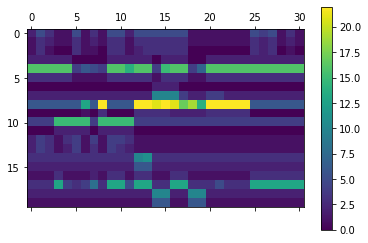

In [82]:
plt.matshow(solver_poisson2(solver_poisson2.A_hat, solver_poisson2.B_hat).detach().numpy().astype(int))
plt.colorbar()

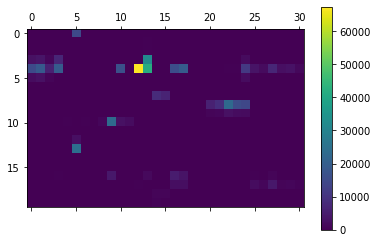

In [83]:
plt.matshow(solver_poisson2.coverages.numpy().astype(int))
plt.colorbar()

In [ ]:
solver.B_hat.exp().detach().numpy()[good_both.values]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 5

In [ ]:
solver_poisson2_ptrs = pd.DataFrame(
    solver_poisson2.B_hat.exp().detach().numpy(),
    index=solver_poisson2.genome_ids,
    columns=solver_poisson2.sample_ids
)

In [ ]:
torch.nn.PoissonNLLLoss(log_input=False)(torch.tensor([0]), torch.tensor([4]))

tensor(73.6827)

In [ ]:
good_both.values.shape

(5, 30)

In [ ]:
solver_poisson2.B_hat.shape

torch.Size([9, 31])